# Bonus: Temperature Analysis I

In [1]:
import pandas as pd
from datetime import datetime as dt

In [2]:
# "tobs" is "temperature observations"
df = pd.read_csv('Resources./hawaii_measurements.csv')
df.head()

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,NaN,73


In [3]:
# Convert the date column format from string to datetime
df['date'] = pd.to_datetime(df['date'])

In [4]:
# Set the date column as the DataFrame index
df.set_index('date', inplace=True)
df


,station,prcp,tobs
date,,,
2010-01-01,USC00519397,0.08,65
2010-01-02,USC00519397,0.00,63
2010-01-03,USC00519397,0.00,74
2010-01-04,USC00519397,0.00,76
2010-01-06,USC00519397,NaN,73
...,...,...,...
2017-08-19,USC00516128,0.09,71
2017-08-20,USC00516128,NaN,78
2017-08-21,USC00516128,0.56,76


In [5]:
# Drop the date column
#Date is set to index and removed as above 

### Compare June and December data across all years 

In [6]:
from scipy import stats

In [7]:
# Filter data for desired months
june_df = df[df.index.month.isin([6])]
june_df


,station,prcp,tobs
date,,,
2010-06-01,USC00519397,0.00,78
2010-06-02,USC00519397,0.01,76
2010-06-03,USC00519397,0.00,78
2010-06-04,USC00519397,0.00,76
2010-06-05,USC00519397,0.00,77
...,...,...,...
2017-06-26,USC00516128,0.02,79
2017-06-27,USC00516128,0.10,74
2017-06-28,USC00516128,0.02,74


In [8]:
# Identify the average temperature for June
avg_june = june_df['tobs'].mean()
avg_june

74.94411764705882

In [12]:
# Identify the average temperature for December
dec_df = df[df.index.month.isin([12])]
dec_df

avg_dec = dec_df['tobs'].mean()
avg_dec

71.04152933421226

Ttest_indResult(statistic=31.60372399000329, pvalue=3.9025129038616655e-191)

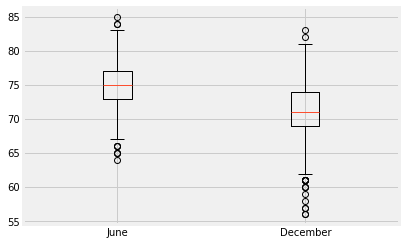

In [16]:
# Create collections of temperature data
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

box_data = [june_df["tobs"],dec_df["tobs"]]
plt.boxplot(box_data,labels=['June', 'December']);
stats.ttest_ind(june_df["tobs"], dec_df["tobs"])

# Run paired t-test


### Analysis

While they look like they are similar based on averages there is a statistical significance less than .05 to reject the null hypothesis to conclude that there is a notable difference in temperature based on the months of June and December